# Problem Explanation

A company has gathered data on 238 of its customers and wants information extracted from this dataset. In this analysis, an extensive exploratory analysis will be completed, followed by a simple linear regression model development to streamline information gathering for marketing campaigns and broader business decisions.

The dataset used for this analysis was retrieved from Kaggle at the following link: https://www.kaggle.com/datasets/hanaksoy/customer-purchasing-behaviors

Below is a very brief overview of the characteristics of this dataset.

The Customer Purchasing Behaviors dataset contains 7 features and 238 records. 

Features:
- user_id
- age
- annual_income (in USD)
- purchase_amount (in USD)
- loyalty_score (between 0 and 10)
- region (of the United States)
- purchase_frequency (average number of purchases per year)

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
import math

# Import Dataset

In [2]:
# Import dataset
raw_data = pd.read_csv('Customer Purchasing Behaviors.csv')

# Exploratory Data Analysis

This EDA explores the structure of the dataset, assess the presence of nulls, discusses summary statistics and measures of central tendancy for each feature, and identifies patterns and relationships through a series of visualizations.

### Explore Dataset Structure and Nulls

In [3]:
# Review top rows
raw_data.head()

,user_id,age,annual_income,purchase_amount,loyalty_score,region,purchase_frequency
0,1,25,45000,200,4.5,North,12
1,2,34,55000,350,7.0,South,18
2,3,45,65000,500,8.0,West,22
3,4,22,30000,150,3.0,East,10
4,5,29,47000,220,4.8,North,13


In [4]:
# Review structure of data
raw_data.shape

(238, 7)

In [5]:
# Review column names
raw_data.columns

Index(['user_id', 'age', 'annual_income', 'purchase_amount', 'loyalty_score',
       'region', 'purchase_frequency'],
      dtype='object')

In [6]:
# Check for nulls
raw_data.isna().sum()

user_id               0
age                   0
annual_income         0
purchase_amount       0
loyalty_score         0
region                0
purchase_frequency    0
dtype: int64

In [7]:
# Check for inconsistent data-types
raw_data.dtypes

user_id                 int64
age                     int64
annual_income           int64
purchase_amount         int64
loyalty_score         float64
region                 object
purchase_frequency      int64
dtype: object

### Generate Summary Statistics

In [8]:
raw_data.describe()

,user_id,age,annual_income,purchase_amount,loyalty_score,purchase_frequency
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,119.500000,38.676471,57407.563025,425.630252,6.794118,19.798319
std,68.848868,9.351118,11403.875717,140.052062,1.899047,4.562884
min,1.000000,22.000000,30000.000000,150.000000,3.000000,10.000000
25%,60.250000,31.000000,50000.000000,320.000000,5.500000,17.000000
50%,119.500000,39.000000,59000.000000,440.000000,7.000000,20.000000
75%,178.750000,46.750000,66750.000000,527.500000,8.275000,23.000000
max,238.000000,55.000000,75000.000000,640.000000,9.500000,28.000000


The above summary statistics gives a good overview of some basic customer information. For example, the average customer age is ~39, with an annual income of 57407.56 USD and an average yearly purchase amount of 425.63 USD. The average loyalty score is 6.8, which is great news for the company as it means that most customers remain loyal to the company. This is further supported by the average purchase frequency, which is ~20 times per year. The minimum and maximum values help to give an understanding of the range of data, which is especially important for understanding the features. Due to each feature being a different scale, the range of values varies greatly. This means the data will have to be standardized when building a machine learning model so the model is not biased towards a feature with greater scale than another.

While these summary statistics are helpful for understanding the dataset, they are not optimal for a quick analysis. Below is a boxplot that represents the summary statistics for each feature.

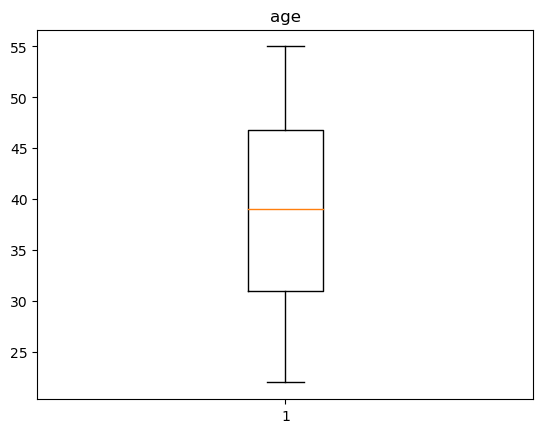

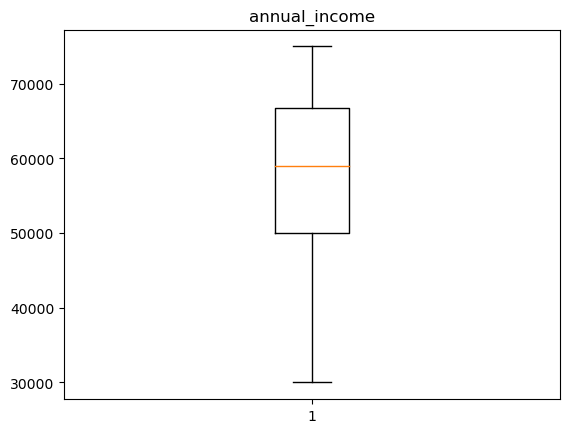

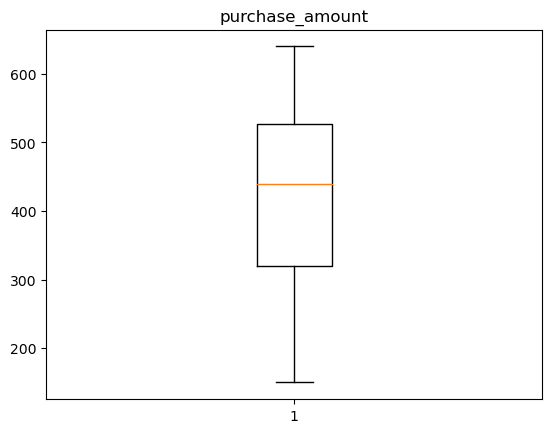

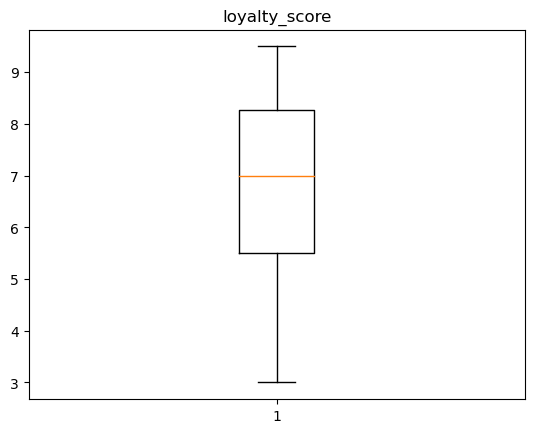

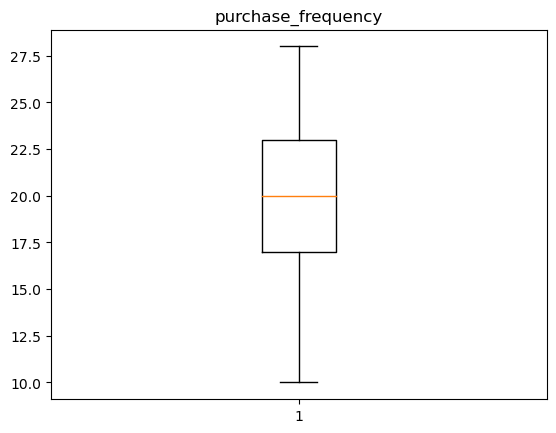

In [69]:
# Create boxplot?

features_to_box = ['age', 'annual_income', 'purchase_amount', 'loyalty_score', 'purchase_frequency']

for f in features_to_box:
    plt.boxplot(raw_data[f])
    plt.title(f)
    plt.xticks(ticks=None, labels=None)
    plt.show()

### Generate Visualizations

Before generating scatter plots to identify possible relationships between features, it is important to assess the distributions of data for each feature. Some machine learning models require data to be normally distributed, and plotting current distributions will help to identify if the Central Limit Theorem will need to be applied.

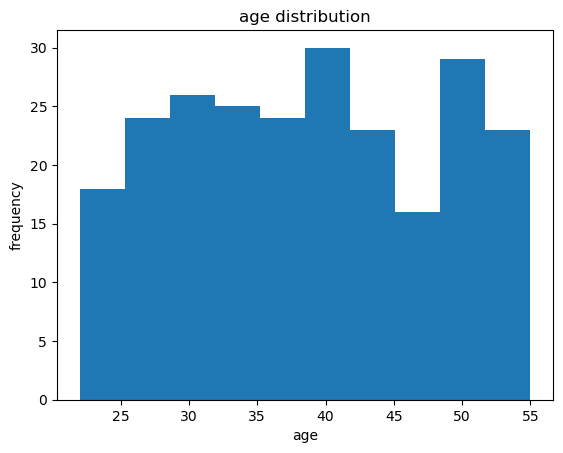

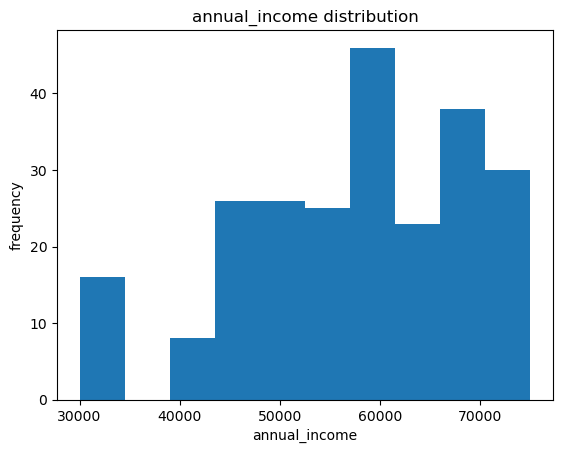

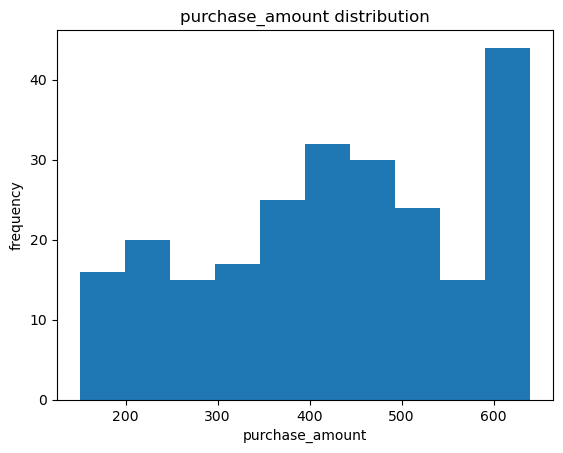

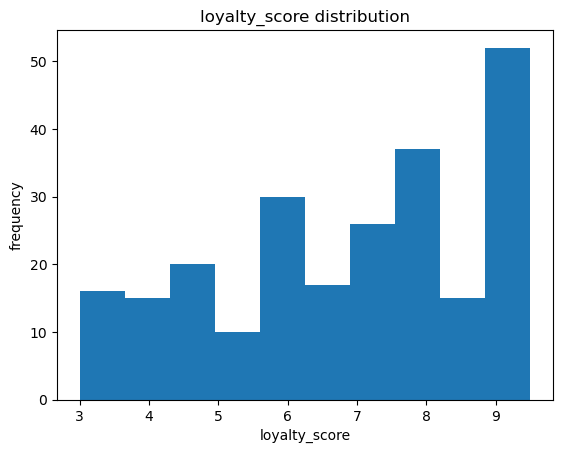

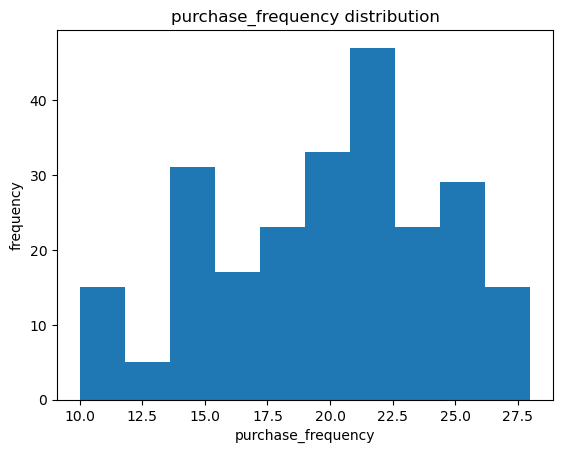

In [11]:
# Histograms for age, annual income, purchase amount, loyalty score, and purchase frequency

columns = ['age', 'annual_income', 'purchase_amount', 'loyalty_score', 'purchase_frequency']

for c in columns:
    plt.hist(raw_data[c])
    plt.title(f'{c} distribution')
    plt.xlabel(c)
    plt.ylabel('frequency')
    plt.show()

Due to the small dataset size, these distributions are not as clear as larger datasets. However, insights can still be gleaned. 

#### **Age Distribution**
For the first distribution, age appears to take on a uniform distribution. This makes sense, as the dataset was designed to not be biased by the age of the customer. 

#### **Annual Income Distribution**
The annual_income distribution appears to be slightly skewed to the left (negatively skewed), which means a larger portion of customers have annual incomes above the dataset average, with a few customers having annual incomes much lower than expected. 

#### **Purchase Amount Distribution**
The purchase_amount distribution is actually quite tricky to assess. It appears to be somewhat normally distributed until the 600-650 bin, which contains a staggering number of customers, introducing skewness to the distribution. Therefore, additional data may be needed to confirm the distribution, but it appears to be negatively skewed.

#### **Loyalty Score Distribution**
The loyalty_score distribution is also skewed to the left, though this level of skewness is much higher than in the annual_income distribution. This means a majority of the customers in the dataset have high loyalty scores, which is good news for the company. If the distribution was skewed to the right, or even normally distributed around 5, it would be recommended that the company run some promotions to improve the loyalty of its customers. Thus, this negative skewness is a good sign for the company.

#### **Purchase Frequency Distribution**
The purchase_frequency ditribution appears to be normally distributed around the mean. The average purchase frequency, or number of purchases per year, seems to be between 18 and 20, which is around 1.5 times per month. This makes sense, as most of the customers have high loyalty scores, and so would be making purchases consistently throughout the year. 

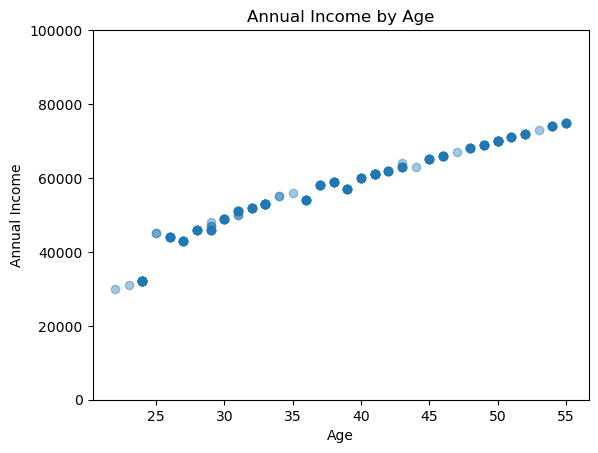

In [12]:
# Annual income by age
plt.scatter(raw_data['age'], raw_data['annual_income'], alpha=0.4)
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.title('Annual Income by Age')

ax = plt.gca()
ax.set_ylim([0, 100000])

plt.show()

Annual and income appear to be linearly related, which is expected for the given age range. As customers advance in their careers, and get older, their annual income will increase. If the age bracket was lower (e.g., starting at 10), the relationship would appear to take on the shape of an exponential curve, with a big jump between the age of minimum-wage jobs and the age of post-graduate jobs. In this case, however, the age bracket is strictly post-graduate, so takes on a linear relationship.

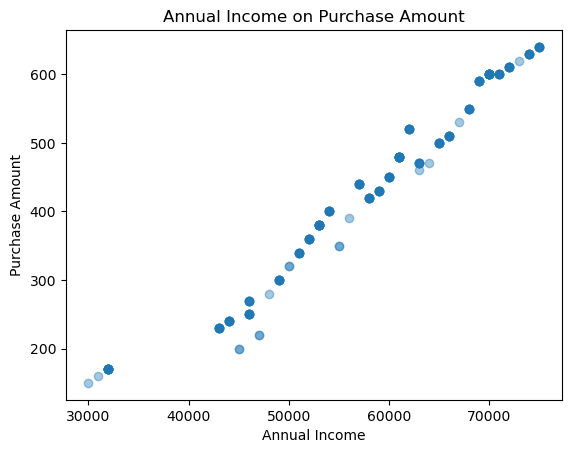

In [13]:
# Annual income and purchase amount
plt.scatter(raw_data['annual_income'], raw_data['purchase_amount'], alpha=0.4)
plt.title('Annual Income on Purchase Amount')
plt.xlabel('Annual Income')
plt.ylabel('Purchase Amount')
plt.show()

The relationship bewteen annual income and purchase amount is positively linear. As income increases, so too does the purchase amount.

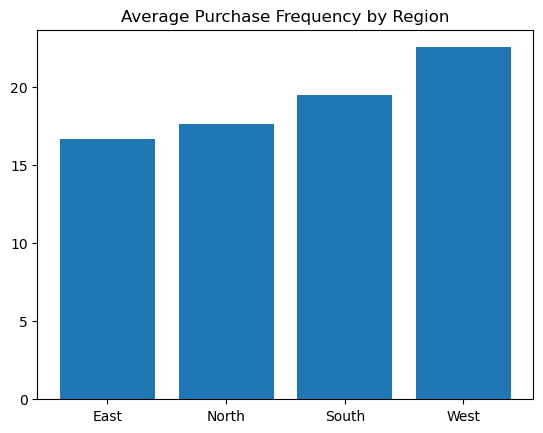

In [14]:
# Average purchase frequency by region
region_purchase = raw_data[['region', 'purchase_frequency']].groupby(['region'], as_index=False).mean()

plt.bar(region_purchase['region'], region_purchase['purchase_frequency'])
plt.title('Average Purchase Frequency by Region')
    
plt.show()

According to the bar chart, the West region has the highest average purchase frequency, with the South being second, the North being third, and the East being last. With that said, the average purchase frequency is not staggeringly low in any region, with all regions being between 17 and 25, respectively.

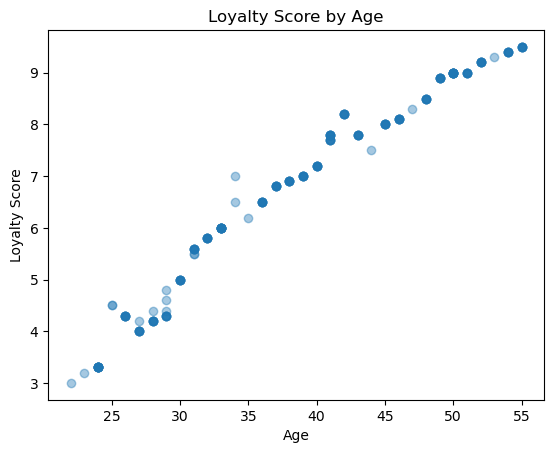

In [15]:
# Loyalty score by age
plt.scatter(raw_data['age'], raw_data['loyalty_score'], alpha=0.4)
plt.title('Loyalty Score by Age')
plt.xlabel('Age')
plt.ylabel('Loyalty Score')
plt.show()

Interestingly, the loyalty score and age relationship is positively linear. Perhaps this is the case because as someone gets older, they have a higher income, which leads them to purchase more and more often, thus increasing their loyalty to the company.

In [16]:
# Average purchase frequency by loyalty score

def calculate_avg_frequency(loyalty_score):
    '''Function that calculates the average purchase frequency for a given loyalty score, rounded to a whole number'''
    
    purchase_frequencies_list = [n for n in raw_data[raw_data['loyalty_score'] == score]['purchase_frequency']]
    purchase_frequencies_array = np.array(purchase_frequencies_list)
    avg_freq = round(purchase_frequencies_array.mean())
    
    return avg_freq

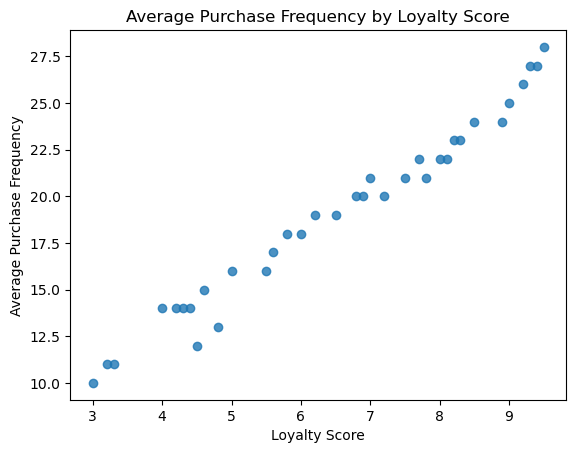

In [17]:
# Create dictionary of average purchase frequency per loyalty score
loyalty_scores = raw_data['loyalty_score'].unique()

avg_per_score = {}
indx = 0
for score in loyalty_scores:
    avg_per_score[indx] = [score, calculate_avg_frequency(score)]
    indx += 1

avg_per_score

# Convert to Pandas DataFrame
avg_freq_df = pd.DataFrame.from_dict(avg_per_score, orient='index', columns=['Loyalty Score', 'Avg Purchase Frequency'])

plt.scatter(avg_freq_df['Loyalty Score'], avg_freq_df['Avg Purchase Frequency'], alpha=0.8)
plt.title('Average Purchase Frequency by Loyalty Score')
plt.xlabel('Loyalty Score')
plt.ylabel('Average Purchase Frequency')
plt.show()

The average purchase frequency and loyalty score appears to be linearly related. More specifically, the features take on a postive linear relationship. This means the average purchase frequency of a customer has a direct correlation with the loyalty score they recieve. This fact, combined with the observed behavior of increasing annual incomes with increased ages, confirms the theory that age a customer's age indirectly impacts their loyalty score, simply because they have more money and can therefore spend more.

### Correlations

The calculations for the correlation between features is given below. These correlation values will help to confirm the observed feature behaviors identified in the 'Generate Visualization' section above.

In [18]:
raw_data[['age', 'annual_income', 'purchase_amount', 'loyalty_score', 'purchase_frequency']].corr()

,age,annual_income,purchase_amount,loyalty_score,purchase_frequency
age,1.000000,0.974833,0.986140,0.981835,0.980532
annual_income,0.974833,1.000000,0.984208,0.984351,0.982920
purchase_amount,0.986140,0.984208,1.000000,0.994147,0.993579
loyalty_score,0.981835,0.984351,0.994147,1.000000,0.986990
purchase_frequency,0.980532,0.982920,0.993579,0.986990,1.000000


Based on the above correlation matrix, there appears to be a strong positive correlation between all features. As age increases, so too does annual income, purchase amount, loyalty score, and purchase frequency. Moreover, as each of these features increases, so too do the others. For example, as a customer's loyalty score increases, so too does the customer's age, annual income, purchase amount, and purchase frequency. This confirms the positive linearity observed between these features in the above section. However, it is important to note that correlation does not mean causation. This brings the study to the hypothesis testing section, where correlation will be tested further between age and annual income.

# Hypothesis Testing

It appears that there is a correlation between age and annual income. In other words, as the age of the customer increases, so too does annual income. Based on the above scatter plots, it also appears that customers who are older than 40 make significantly more than customers who are less than 40. In order to confirm or deny this theory, a hypothesis test will be conducted.

**Hypothesis Test:** There is a statistical difference between the average annual incomes of customers below 40 versus customers above 40. We want to test whether customers who are older have jobs that pay more or if the average annual incomes of customers does not statistically vary much by age.

**Null Hypothesis:** Average annual income of customers below 40 is greater than or equal to the average annual income of customers above 40.

**Alternative Hypothesis:** Average annual income of customers below 40 is less than the average annual income of customers above 40.

In [19]:
# Generate average samples from dataset

# Define sampling function
def calculate_averages(data, iterations, feature, sample_size):
    averages = []
    for i in range(iterations):
        sample = random.sample(list(data[feature]), sample_size)
        averages.append(np.mean(np.array(sample)))
    return averages

In [20]:
# Extract records below and above forty

below_forty = raw_data[raw_data['age'] < 40]
above_forty = raw_data[raw_data['age'] >= 40]

In [21]:
# Calculate below forty averages for sample

below_forty_avgs = calculate_averages(below_forty, 50, 'annual_income', 20)
below_forty_avgs

[49750.0,
 48800.0,
 47800.0,
 47550.0,
 48900.0,
 51150.0,
 48350.0,
 50400.0,
 46000.0,
 48900.0,
 49250.0,
 49150.0,
 46950.0,
 51000.0,
 46800.0,
 49300.0,
 50700.0,
 50300.0,
 48350.0,
 47500.0,
 48100.0,
 46600.0,
 45550.0,
 48700.0,
 46950.0,
 52000.0,
 48700.0,
 48950.0,
 50600.0,
 48650.0,
 50000.0,
 49350.0,
 51500.0,
 49750.0,
 45850.0,
 48550.0,
 48900.0,
 45900.0,
 46650.0,
 48300.0,
 48600.0,
 46800.0,
 49900.0,
 46750.0,
 49750.0,
 47100.0,
 47200.0,
 48650.0,
 46250.0,
 50900.0]

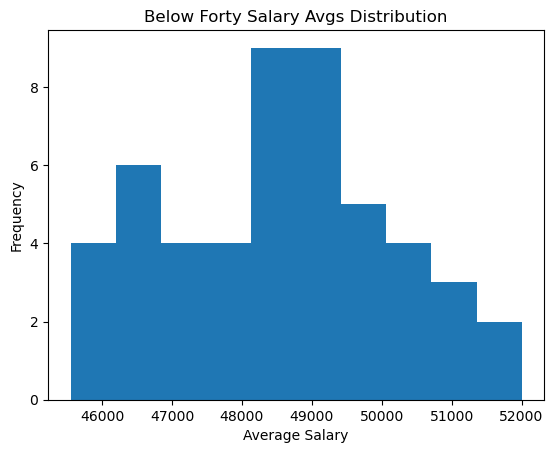

In [22]:
# Histogram of below forty averages

plt.hist(below_forty_avgs)
plt.title('Below Forty Salary Avgs Distribution')
plt.xlabel('Average Salary')
plt.ylabel('Frequency')
plt.show()

In [23]:
# Calculate above forty averages for sample

above_forty_avgs = calculate_averages(above_forty, 50, 'annual_income', 20)
above_forty_avgs

[66650.0,
 66350.0,
 66850.0,
 65800.0,
 66650.0,
 66750.0,
 66300.0,
 67500.0,
 66850.0,
 67950.0,
 67500.0,
 65500.0,
 65900.0,
 68050.0,
 67800.0,
 67000.0,
 65900.0,
 66550.0,
 65400.0,
 67800.0,
 65500.0,
 67350.0,
 65400.0,
 67500.0,
 67750.0,
 67300.0,
 67200.0,
 66900.0,
 66400.0,
 67900.0,
 67950.0,
 67000.0,
 70250.0,
 66550.0,
 67000.0,
 67150.0,
 66550.0,
 67250.0,
 68700.0,
 65450.0,
 67800.0,
 65550.0,
 64850.0,
 66900.0,
 67950.0,
 67800.0,
 67300.0,
 67850.0,
 67000.0,
 66950.0]

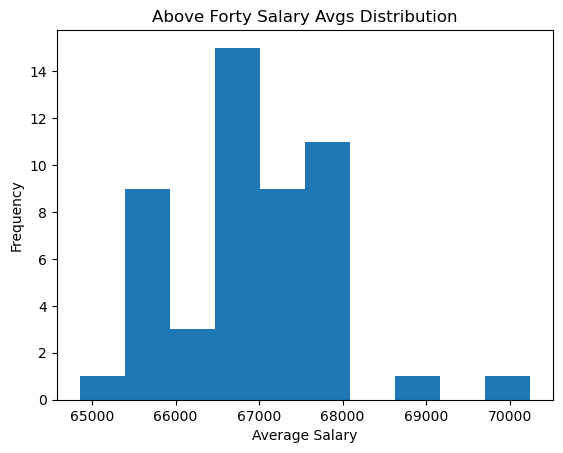

In [24]:
# Histogram of above forty averages

plt.hist(above_forty_avgs)
plt.title('Above Forty Salary Avgs Distribution')
plt.xlabel('Average Salary')
plt.ylabel('Frequency')
plt.show()

As seen from the above histograms, both samples of records appear to take on a similar shape. In other words, the extracted samples are normally distributed, and therefore, can be compared for a hypothesis test. However, it is important to confirm that both samples are normally distributed.

In [25]:
#Check assumption of normality

In [26]:
# Define normality function

def check_normality(data):
    test_stat_normality, p_value = stats.shapiro(data)
    
    print(f'p-value: {round(p_value, 2)}')
    
    if p_value < 0.05:
        print('The data is not normally distributed')
    else:
        print('The data is normally distributed')

In [27]:
check_normality(below_forty_avgs)

p-value: 0.44
The data is normally distributed


In [28]:
check_normality(above_forty_avgs)

p-value: 0.06
The data is normally distributed


As expected, the samples are both normally distributed. From the histograms, customers below forty appear to have a wider dispertion of annual salaries compared to customers above forty. A different in variance will not affect the outcome of the hypothesis test in this case, but it is still important to confirm.

In [29]:
# Check assumption of variance

In [30]:
# Define variance function

def check_variance(dataset1, dataset2):
    test_stat_variance, p_value = stats.levene(dataset1, dataset2)
    
    print(f'p-value: {round(p_value, 2)}')
    
    if p_value < 0.05:
        print('The variances of the samples are different.')
    else:
        print('The variances of the samples are same.')

In [31]:
check_variance(below_forty_avgs, above_forty_avgs)

p-value: 0.0
The variances of the samples are different.


The two variances of the samples are indeed different. This is a beginning indication that the average annual salary of customers below forty is, from a statistical significance perspective, lower than customers above forty. With those assumptions identified, a test statistic can now be calculated. Because the means of samples are being compared, a t-test will be used.

In [32]:
# Calculate test statistic
ttest, p_value = stats.ttest_ind(below_forty_avgs, above_forty_avgs)

# Since the hypothesis is one sided use p_value/2
print(f'P-value: {round(p_value/2, 2)}')


if p_value/2 <0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

P-value: 0.0
Reject null hypothesis


### Conclusion

With a P-value well below the alpha value of 0.05, the null hypothesis is rejected. This means there is a statistical significance of the average salary between samples of customers below forty and samples of customers above forty. Moreover, the null hypothesis being rejected also means that the average annual income of customers below 40 is less than the average annual income of customers above 40. This is important for those at this company desigining compaigns and other marketing materials, as some advertisements may not be effective in customers below forty due to having statistically less money than customers above forty. Thus, the company may seek to target these two segments of customers separately, resulting in more personalized advertisements. Younger customers had lower loyalty scores, most likely due to having less disposable income. A more personalized advertisement or special discount would help to increase purchases from these customers, resulting in increased loyalty.

# Data Modeling

A company wants to introduce a discount as part of a marketing campaign to bring in new customers, but is not sure how much a given customer would purchase. Using the given dataset, a linear regression model will be developed to predict the purchase amount of a customer based on a set of characteristics.

Customer Characteristics:
- Age
- Annual Income

To start, the given features need to be extracted and standardized.

### Extarct and Standardize Features

In [33]:
# Extract age, annual_income, and purchase_amount
extract = raw_data[['age', 'annual_income', 'purchase_amount']]

In [34]:
# Initialize instance of StandardScaler
scaler = StandardScaler()

# Fit with DataFrame
extract_scaled = pd.DataFrame(scaler.fit_transform(extract), columns=extract.columns)

extract_scaled

,age,annual_income,purchase_amount
0,-1.465632,-1.090306,-1.614441
1,-0.501151,-0.211563,-0.541153
2,0.677658,0.667180,0.532134
3,-1.787125,-2.408420,-1.972203
4,-1.036974,-0.914557,-1.471336
...,...,...,...
233,0.141835,0.227809,0.174372
234,-0.072494,0.139934,0.031267
235,1.642138,1.458049,1.462317
236,-0.715480,-0.475186,-0.469601


In [35]:
# Split data into explanatory variables (features) and the target variable
features = extract_scaled[['age', 'annual_income']]
target = extract_scaled[['purchase_amount']]

### Develop Model

With the data standardized, the dataset can be split into training and test sets, and a LinearRegression model can be initialized. 

In [36]:
# Split data into train and test data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

In [37]:
# Initialize instance of LinearRegression
lr_model = LinearRegression()

In [38]:
# Fit model with train data
lr_model.fit(X_train, y_train)

LinearRegression()

### Predict Values and Assess Model Performance

Now that the LinearRegression model has been fit with the training data, the test data can be used to generate predictions. From there, model accuracy will be assessed using these predictions. It is important to note that the predictions will be in a standardized format.

In [39]:
# Predict with test data
predictions = lr_model.predict(X_test)

In [40]:
# Compare predictions with actual y-values

def compare_predicts_actual(predictions, actual):

    predicts = []
    for p in predictions.tolist():
        predicts.append(p[0])

    comparison = {'Predictions': predicts,
                  'Actual Values': list(actual)}

    comparison_df = pd.DataFrame(comparison)
    return comparison_df

In [41]:
compare_df = compare_predicts_actual(predictions, y_test['purchase_amount'])
compare_df

,Predictions,Actual Values
0,1.559250,1.462317
1,-1.987557,-1.900651
2,1.266520,1.247659
3,1.168944,1.247659
4,-0.284117,-0.183391
...,...,...
67,-0.056057,-0.040286
68,0.193178,0.174372
69,-1.064730,-1.256678
70,-0.284117,-0.183391


The two statistics used to assess model accuracy will be mean-squared error (MSE) and R^2

In [42]:
# MSE

# Given values
y_true = compare_df['Actual Values']  # Original values
y_pred = compare_df['Predictions']  # Predicted values

# Calculate Mean Squared Error
mse_value = mean_squared_error(y_true, y_pred)
print(f"MSE: {mse_value:.5f}")


MSE: 0.01525


In [43]:
# r^2

r2 = r2_score(y_true, y_pred)
print(f"R^2 Score: {r2:.5f}")

R^2 Score: 0.98666


A low MSE value means that there is very little error between the actual and predicted values, which is a good sign for model performance. However, a low MSE value could also indicate underfitting if the R^2 value is low. Fortunately, the R^2 value is high, providing further support for a model with high performance. Therefore, the chosen LinearRegression model was a good choice for this dataset and corresponding features. However, With this current model, it is difficult to actually use the predictions, as they are in a standardized format. Building a pipeline will help to resolve this issue and make the LinearRegression model usable. Moreover, a pipeline will allow for easy standardizing and unstadardizing of predictions.

### Create pipeline

In [44]:
# Split data into explanatory variables and the target variable
features = extract[['age', 'annual_income']]
target = extract[['purchase_amount']]

In [45]:
# Split data into train and test data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

In [46]:
# Initialize the Pipeline with the standardization and model-development steps
pipe = Pipeline([('scaler', StandardScaler()), ('linear_regression', LinearRegression())])

In [47]:
# Fit the pipeline just like a regular model
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_regression', LinearRegression())])

In [48]:
# Make predictions
unstandardized_predictions = pipe.predict(X_test)

It is important to note that, unlike in the previous model development, the predictions made from this pipeline will be in an unstandardized format. This makes using the model for business purposes much easier, but makes assessing the LinearRegression model's performance more complex.

In [49]:
print(unstandardized_predictions)

[[643.54715932]
 [147.85426395]
 [602.63598308]
 [588.99892433]
 [385.92275615]
 [575.36186558]
 [323.81613526]
 [534.45068933]
 [520.81363059]
 [417.79583345]
 [251.03188172]
 [588.99892433]
 [376.8846572 ]
 [426.8339324 ]
 [452.62833684]
 [643.54715932]
 [431.43289219]
 [431.43289219]
 [343.53186686]
 [249.55216867]
 [329.89480811]
 [284.38467207]
 [249.55216867]
 [643.54715932]
 [276.82628617]
 [310.17907651]
 [452.62833684]
 [161.4913227 ]
 [276.82628617]
 [548.08774808]
 [493.53951309]
 [588.99892433]
 [284.38467207]
 [534.45068933]
 [561.72480683]
 [284.38467207]
 [479.90245434]
 [643.54715932]
 [431.43289219]
 [357.1689256 ]
 [520.81363059]
 [290.46334492]
 [426.8339324 ]
 [251.03188172]
 [161.4913227 ]
 [588.99892433]
 [629.91010057]
 [161.4913227 ]
 [493.53951309]
 [616.27304183]
 [616.27304183]
 [466.26539559]
 [588.99892433]
 [431.43289219]
 [561.72480683]
 [161.4913227 ]
 [329.89480811]
 [466.26539559]
 [161.4913227 ]
 [493.53951309]
 [466.26539559]
 [657.18421807]
 [588.99

In [50]:
print(y_test)

     purchase_amount
115              630
15               160
212              600
126              600
6                400
..               ...
101              420
233              450
195              250
108              400
29               450

[72 rows x 1 columns]


In [51]:
# Compare actual to predicted unstandardized values
pipe_compare_df = compare_predicts_actual(unstandardized_predictions, y_test['purchase_amount'])
pipe_compare_df

,Predictions,Actual Values
0,643.547159,630
1,147.854264,160
2,602.635983,600
3,588.998924,600
4,385.922756,400
...,...,...
67,417.795833,420
68,452.628337,450
69,276.826286,250
70,385.922756,400


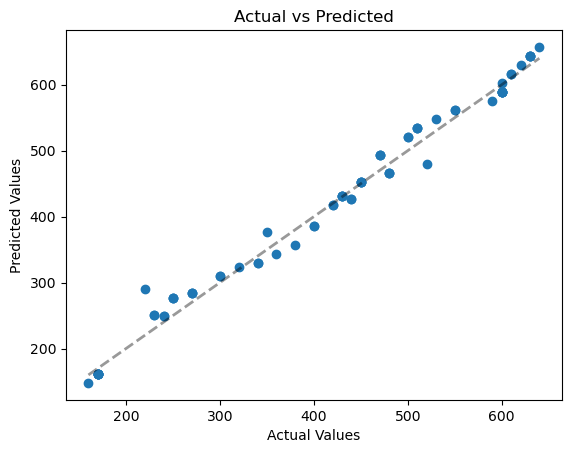

In [59]:
# Plot predictions and actual values with perfect prediction line

plt.scatter(pipe_compare_df['Actual Values'], pipe_compare_df['Predictions'])
# Perfect prediction line
plt.plot([min(pipe_compare_df['Actual Values']), max(pipe_compare_df['Actual Values'])], 
         [min(pipe_compare_df['Actual Values']), max(pipe_compare_df['Actual Values'])], 
         'k--', 
         lw=2,
        alpha=0.4) 
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()

As seen in the above plot, the predicted values and actual values have an almost perfect linear relationship. This is an indicator of good model performance. To further assess the pipeline's performance, the residuals will be calculated and plotted.

In [61]:
# Calculate residuals

residuals = pipe_compare_df['Actual Values'] - pipe_compare_df['Predictions']
residuals

0    -13.547159
1     12.145736
2     -2.635983
3     11.001076
4     14.077244
        ...    
67     2.204167
68    -2.628337
69   -26.826286
70    14.077244
71    -2.628337
Length: 72, dtype: float64

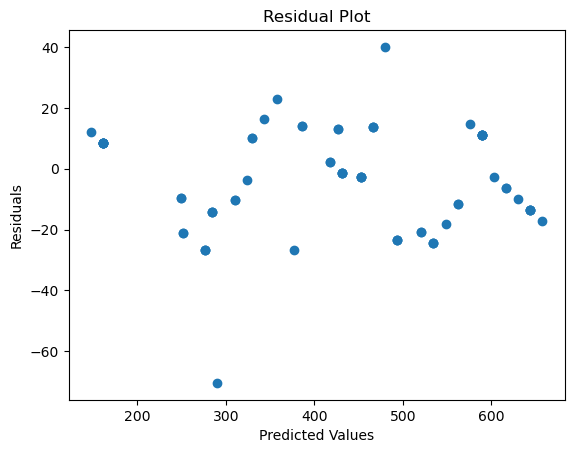

In [65]:
# Plot residuals

plt.scatter(pipe_compare_df['Predictions'], residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

The residuals are the difference between the actual and predicted values. When the residuals are dispersed without an underlying pattern, this is an indication that the data is linear and a LinearRegression model was a good choice for a model. If there was a pattern, this could be evidence of bias being introduced into the model, and heteroscedasticity (the amount of error changing as the input variable changes) could also be present. Thus, if there was a pattern present in the above residual plot, different models may need to be assessed for a better fit of the data. 

With confirmation that a LinearRegression model was a good choice for this dataset, the model's accuracy can be assessed. Because the predictions and actual values are not in a standardized format, RSME will be used instead of MSE. R^2 will also be assessed.

In [55]:
# RMSE
    
y_true = pipe_compare_df['Actual Values']
y_pred = pipe_compare_df['Predictions']

# Calculate Mean Squared Error
mse_value = math.sqrt(mean_squared_error(y_true, y_pred))
print(f"RMSE: {mse_value:.5f}")

RMSE: 17.25941


In [56]:
# r^2

r2_unstandard = r2_score(y_true, y_pred)
print(f"Unstandardized R^2 Score: {r2_unstandard:.5f}")

Unstandardized R^2 Score: 0.98666


The RSME is the average error in the unit of the prediction values, which is why the value is so much higher than the MSE calculated previously. Moreover, a calculated RSME of ~17 means the predicted value differs from the actual value by about 17. Considering the range of actual values falls between 100 and 700, an error of only 17 is very small. This is further confirmed by the R^2 value, which is close to 1. This high R^2 value close to 1 means that the model is very good at predicting, but is not overfitting.

To wrap up, the linear coefficients and intercept will be determined, and the final linear regression equation will be provided.

In [57]:
# Get linear coefficients and intercept

intercept = round(pipe.named_steps['linear_regression'].intercept_[0], 2)
age_coef = round(pipe.named_steps['linear_regression'].coef_[0][0], 2)
income_coef = round(pipe.named_steps['linear_regression'].coef_[0][1], 2)

print(f'Y-Intercept: {intercept}')
print(f'Age Variable Coefficient: {age_coef}')
print(f'Income Variable Coefficient: {income_coef}')

Y-Intercept: 428.8
Age Variable Coefficient: 69.02
Income Variable Coefficient: 65.68


The final Multi-Linear Regression equation is below:

                                                    y = 69.02a + 65.68i + 428.80
Where a is the age and i is the annual income of a given customer.

# Conclusions and Future Steps

Overall, the linear regression model and pipeline can be used to predict the purchase amount of a customer given their age and annual income. This can help the company assess future customer needs, and can help to influence marketing campaigns and discounts. 

In terms of the model development process, as more data is collected about new customers, model performance should continue to be monitored. Furthermore, as the dataset increases, it may become necessary to train new, more robust models to handle the more complex data. This may require more advanced techniques, such as using a grid-search and implementing cross-validation. As these steps are identified, it is important to continuously update the pipeline, which will ensure a streamlined process for deployment and use by the business.